In [2]:
from mlband.imports import *
import mlband.data
import mlband.config
import mlband.model
import mlband.features

In [2]:
data_set_path = 'data/mp-test-2/'
results_dir = 'results/test-2/'

print('Preparing the config...', flush=True)
config = mlband.config.Config(
    data_path=data_set_path, 
    workers=4, 
    results_dir=results_dir,
    original_features=True,
    print_freq=100,
    )

Preparing the config...


In [3]:
print('Downloading the data from MP...' ,flush=True)
df, data = mlband.data.get_list_of_materials(num_chunks=40)

Retrieving SummaryDoc documents:   0%|          | 0/40000 [00:00<?, ?it/s]

Number of missing values:  2


In [4]:
print('Creating the dataset...', flush=True)
mlband.data.create_dataset(df=df, path=data_set_path)

Creating the dataset...


/Users/ali/mambaforge/envs/cgcnn/lib/python3.11/site-packages/pymatgen/core/periodic_table.py:120: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


In [5]:
print('Creating the physical features...', flush=True)
mlband.features.one_hot_encode_elements(config)

Creating the physical features...


In [7]:
%%time
print('Creating and training the model...', flush=True)
mlband.model.train(config)

Creating and training the model...


Training the model...
Epoch: [0][0/500]	Time 21.107 (21.107)	Data 17.464 (17.464)	Loss 1.0621 (1.0621)	MAE 1.037 (1.037)
Test: [0/63]	Time 8.918 (8.918)	Loss 0.4582 (0.4582)	MAE 0.736 (0.736)
* MAE 0.758
Epoch: [1][0/500]	Time 17.260 (17.260)	Data 14.009 (14.009)	Loss 0.5957 (0.5957)	MAE 0.835 (0.835)
Test: [0/63]	Time 11.642 (11.642)	Loss 0.4780 (0.4780)	MAE 0.625 (0.625)
* MAE 0.693
Epoch: [2][0/500]	Time 16.469 (16.469)	Data 13.378 (13.378)	Loss 0.4486 (0.4486)	MAE 0.663 (0.663)
Test: [0/63]	Time 13.246 (13.246)	Loss 0.4347 (0.4347)	MAE 0.625 (0.625)
* MAE 0.634
Epoch: [3][0/500]	Time 16.687 (16.687)	Data 13.987 (13.987)	Loss 0.4238 (0.4238)	MAE 0.578 (0.578)
Test: [0/63]	Time 12.243 (12.243)	Loss 0.4460 (0.4460)	MAE 0.589 (0.589)
* MAE 0.692
Epoch: [4][0/500]	Time 15.792 (15.792)	Data 13.262 (13.262)	Loss 0.2359 (0.2359)	MAE 0.473 (0.473)
Test: [0/63]	Time 11.502 (11.502)	Loss 0.4708 (0.4708)	MAE 0.691 (0.691)
* MAE 0.596
Epoch: [5][0/500]	Time 16.802 (16.802)	Data 13.959 (13.959)	

In [10]:
print('Evaluating the data sets...', flush=True)
mlband.model.evaluate_model(config)

Evaluating the data sets...
Evaluating the train set...
Saving the predictions to results/test-2/predictions_train.csv
MSE for train set: 0.3749
MAE for train set: 0.3918
Evaluating the val set...
Saving the predictions to results/test-2/predictions_val.csv
MSE for val set: 0.5022
MAE for val set: 0.4450
Evaluating the test set...
Saving the predictions to results/test-2/predictions_test.csv
MSE for test set: 0.5067
MAE for test set: 0.4488


In [25]:
df = pd.read_csv(config.results_dir / 'predictions_test.csv')
df

,ID,True_Label,Prediction
0,mp-9937,0.0000,-0.052763
1,mp-1172967,0.0000,0.140506
2,mp-982366,2.5126,1.816474
3,mp-1175038,0.0000,0.352745
4,mp-768127,3.1253,2.300649
...,...,...,...
3994,mp-8399,3.2859,1.227919
3995,mp-1112109,2.2573,1.406988
3996,mp-1021162,0.0000,0.039211
3997,mp-1062676,1.3146,0.079352


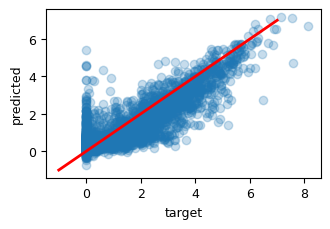

0.44878078555627543

In [24]:
# Plot the predicted vs target values parity plot
import matplotlib.pyplot as plt

plt.scatter(df['True_Label'], df['Prediction'], alpha=0.25)
plt.xlabel('target')
plt.ylabel('predicted')

x = np.linspace(-1, 7, 6)
y = x
plt.plot(x, y, '-r', label='parity')

plt.show()

# pring the mean absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df['True_Label'], df['Prediction'])